In [7]:
from utils import get_pickle

file_pickle = "/home/iksadnorth/IdeaProjects/analyze_data/pickles/app.pickle"
properties = get_pickle(file_pickle)

In [8]:
from utils import classify

table = classify(properties)
properties_Filter, properties_Repository = table['filter'], table['repository']


In [9]:
from collections import defaultdict

# 각 repo 쿼리의 평균 실행시간 계산.
table_page_session_id = defaultdict(lambda : {
    'page-url': '',
    'total-num-calls-of-query' : 0,
    'num-request' : 0,
})
for item in properties_Filter:
    page_session_id = item['page-session-id']

    table_page_session_id[page_session_id]['page-url'] = item['current-page-url']
    table_page_session_id[page_session_id]['total-num-calls-of-query'] += item['num-calls-of-query']
    table_page_session_id[page_session_id]['num-request'] += 1


In [10]:
from utils import draw

x, y_query, y_req = [], [], []
for k,v in table_page_session_id.items():
    if v['page-url'] in x:
        continue
    x.append(v['page-url'])
    y_query.append(v['total-num-calls-of-query'])
    y_req.append(v['num-request'])


<Axes: >

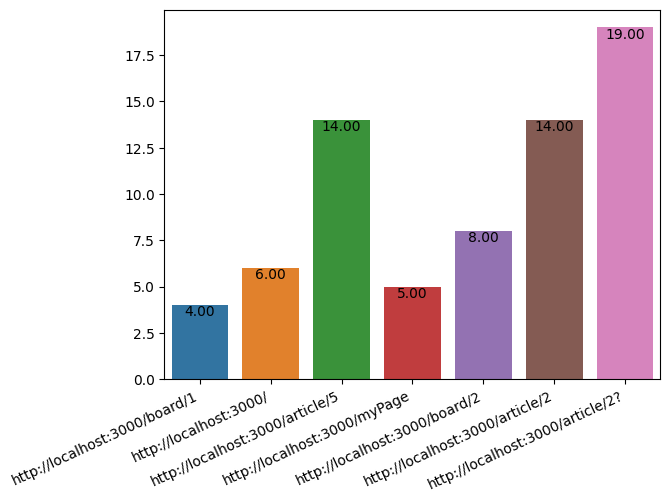

In [11]:
# 한 페이지당 DB 쿼리 갯수.
draw(x,y_query)

<Axes: >

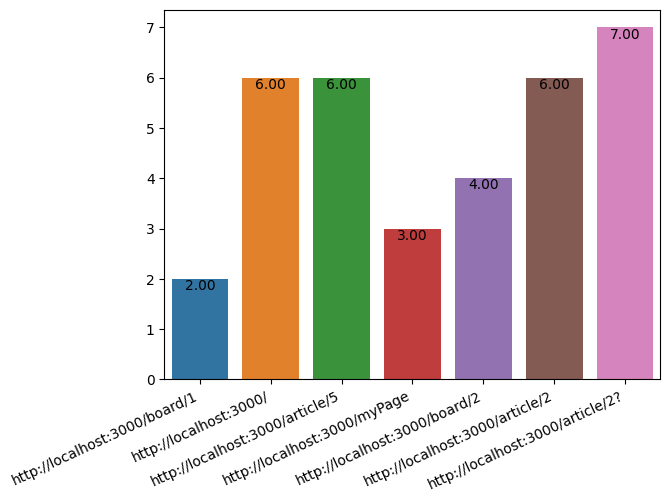

In [12]:
# 한 페이지당 Http Request 쿼리 갯수.
draw(x,y_req)